In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarathsai7787","key":"ec682396a281a837478d235897b32a61"}'}

In [ ]:
!pip install kaggle

In [ ]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download anmolkumar/health-insurance-cross-sell-prediction

Dataset URL: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction
License(s): GPL-2.0
  0% 0.00/6.47M [00:00<?, ?B/s]
100% 6.47M/6.47M [00:00<00:00, 75.3MB/s]


In [ ]:
!unzip /content/health-insurance-cross-sell-prediction.zip

Archive:  /content/health-insurance-cross-sell-prediction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!rm -rf /content/health-insurance-cross-sell-prediction.zip /content/sample_data /content/test.csv /content/sample_submission.csv

In [ ]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/train.csv')
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.dtypes

,0
id,int64
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df = df.drop(columns = ['id'])
df.isna().mean() * 100

,0
Gender,0.0
Age,0.0
Driving_License,0.0
Region_Code,0.0
Previously_Insured,0.0
Vehicle_Age,0.0
Vehicle_Damage,0.0
Annual_Premium,0.0
Policy_Sales_Channel,0.0
Vintage,0.0


In [ ]:
df.duplicated().sum()

269

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.shape

(380840, 11)

In [ ]:
constant_features = [
    feature for feature in df.columns if df[feature].nunique() == 1
]

print(f"Constant features: {constant_features}")

if len(constant_features) > 0:
    df = df.drop(columns=constant_features)
    print(f"Dataframe shape after dropping constant features: {df.shape}")
else:
  print("No constant features found.")

Constant features: []
No constant features found.


In [ ]:
df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
df['Response'].value_counts()

,count
Response,
0,334155
1,46685


In [ ]:
df_0 = df[df['Response'] == 0].head(1000)
df_1 = df[df['Response'] == 1].head(1000)

df = pd.concat([df_0, df_1], axis=0)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0


In [ ]:
df['Response'].value_counts()

,count
Response,
0,1000
1,1000


<Axes: xlabel='Vintage', ylabel='Density'>

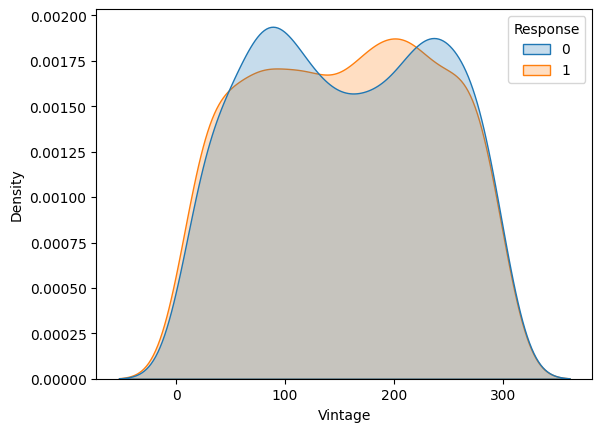

In [ ]:
sns.kdeplot(data=df, x='Vintage', hue='Response', fill=True)

<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

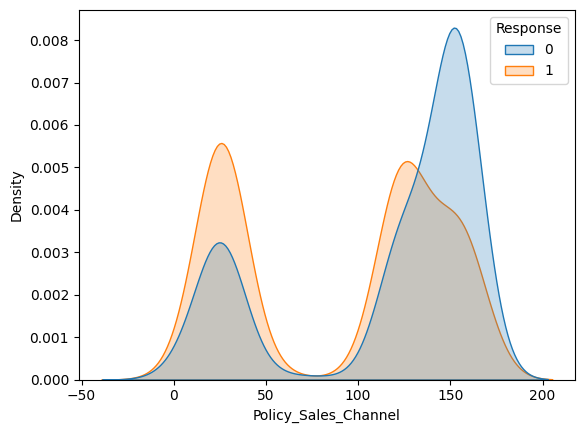

In [ ]:
sns.kdeplot(data=df, x='Policy_Sales_Channel', hue='Response', fill=True)

<Axes: xlabel='Annual_Premium', ylabel='Density'>

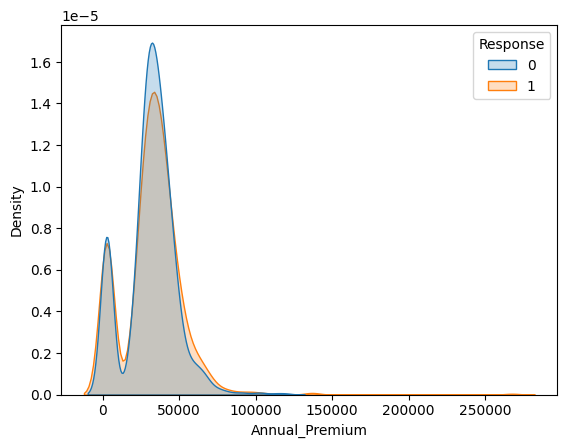

In [ ]:
sns.kdeplot(data=df, x='Annual_Premium', hue='Response', fill=True)

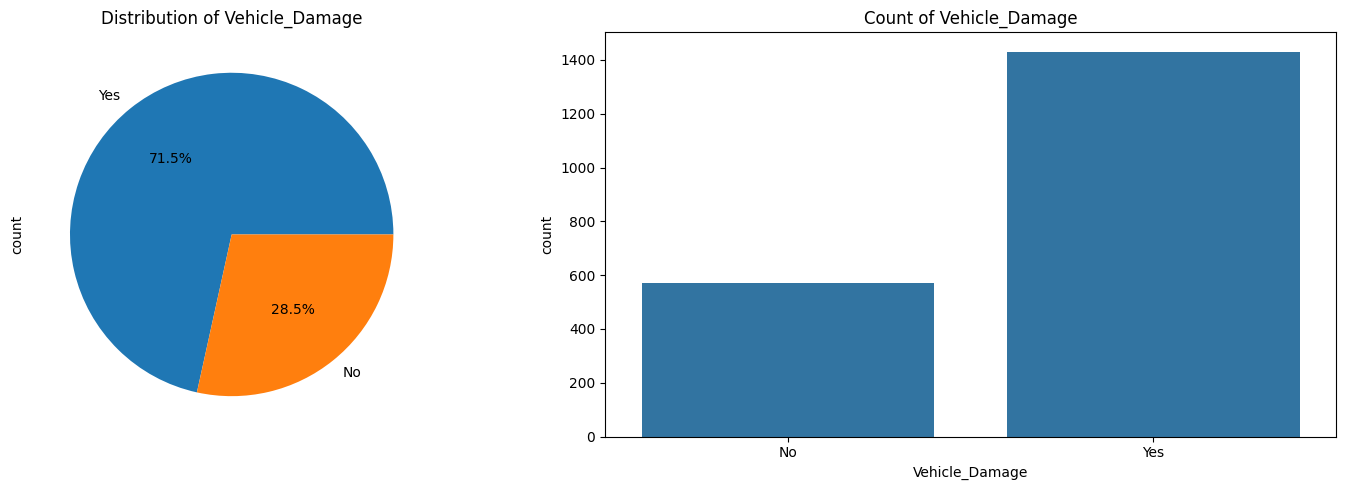

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Vehicle_Damage'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Vehicle_Damage')

# Countplot
sns.countplot(x='Vehicle_Damage', data=df, ax=axes[1])
axes[1].set_title('Count of Vehicle_Damage')

plt.tight_layout()
plt.show()

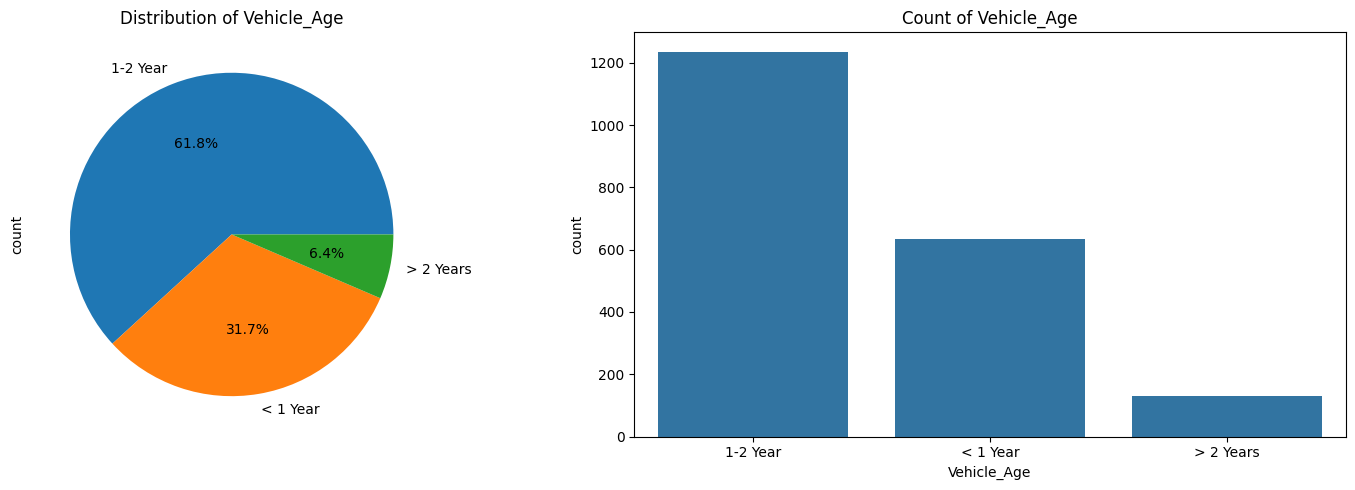

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Vehicle_Age')

# Countplot
sns.countplot(x='Vehicle_Age', data=df, ax=axes[1])
axes[1].set_title('Count of Vehicle_Age')

plt.tight_layout()
plt.show()

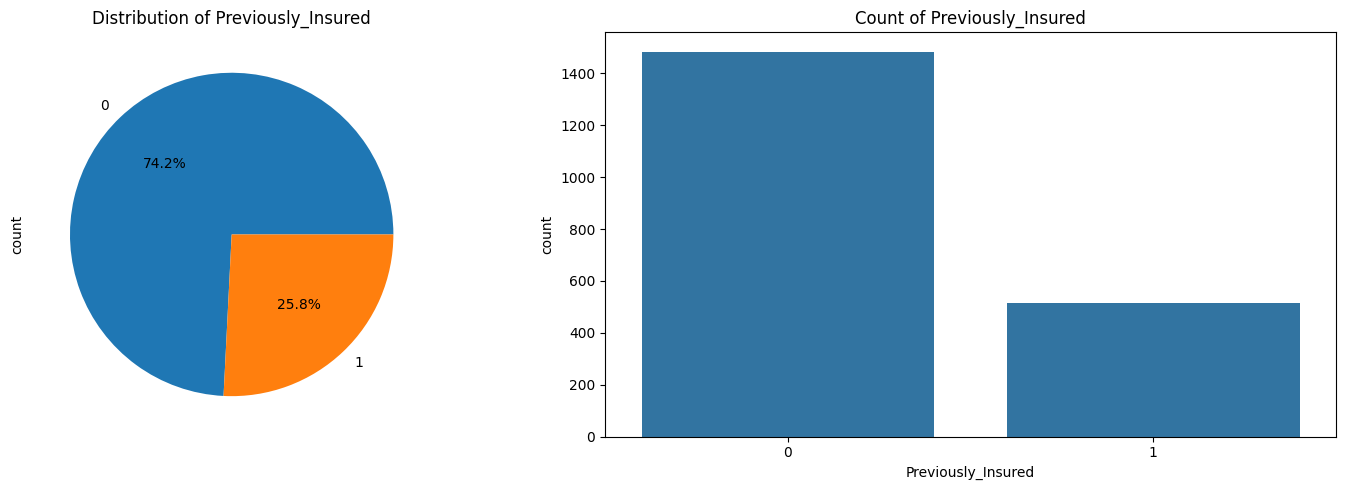

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Previously_Insured'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Previously_Insured')

# Countplot
sns.countplot(x='Previously_Insured', data=df, ax=axes[1])
axes[1].set_title('Count of Previously_Insured')

plt.tight_layout()
plt.show()

In [ ]:
df['Region_Code'].value_counts().head(10)

,count
Region_Code,
28.0,714
8.0,168
46.0,99
41.0,86
3.0,62
30.0,59
15.0,56
29.0,51
36.0,44


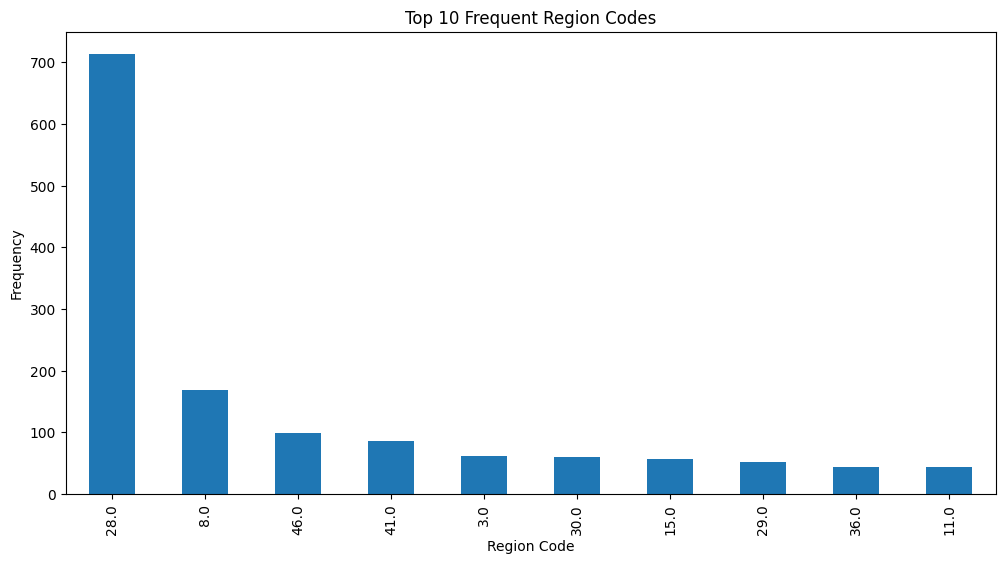

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df['Region_Code'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Frequent Region Codes')
plt.xlabel('Region Code')
plt.ylabel('Frequency')
plt.show()

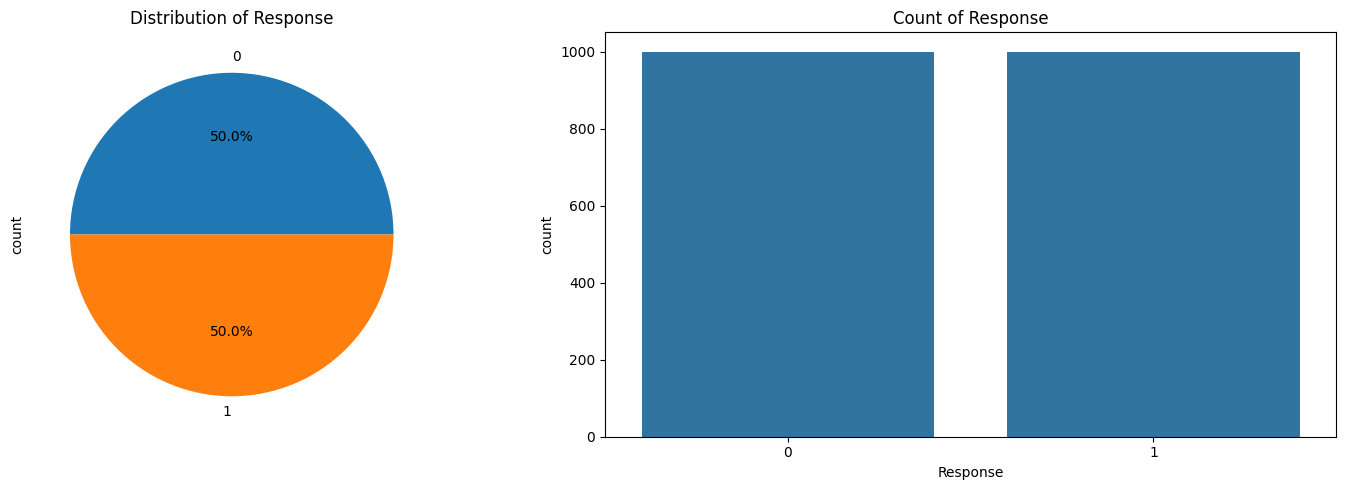

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Response'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Response')

# Countplot
sns.countplot(x='Response', data=df, ax=axes[1])
axes[1].set_title('Count of Response')

plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

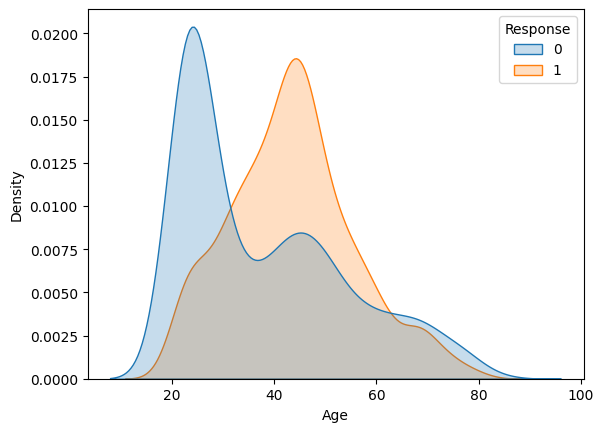

In [ ]:
sns.kdeplot(data=df, x='Age', hue='Response', fill=True)

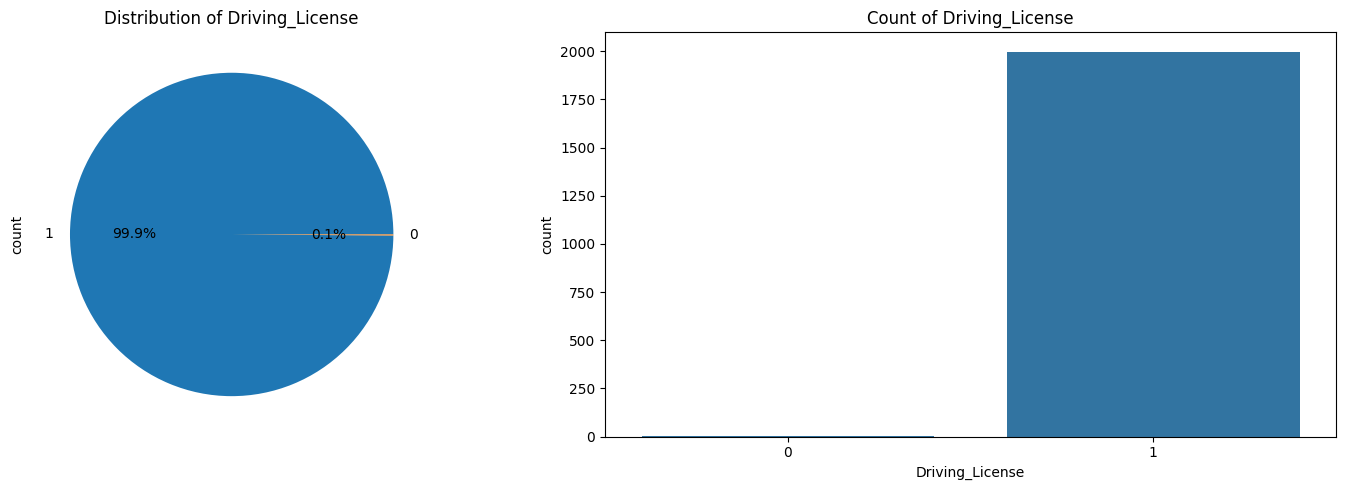

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart
df['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Distribution of Driving_License')

# Countplot
sns.countplot(x='Driving_License', data=df, ax=axes[1])
axes[1].set_title('Count of Driving_License')

plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0
11,Female,24,1,50.0,1,< 1 Year,No,48699.0,152.0,289,0
12,Female,41,1,15.0,1,1-2 Year,No,31409.0,14.0,221,0
13,Male,76,1,28.0,0,1-2 Year,Yes,36770.0,13.0,15,0


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')


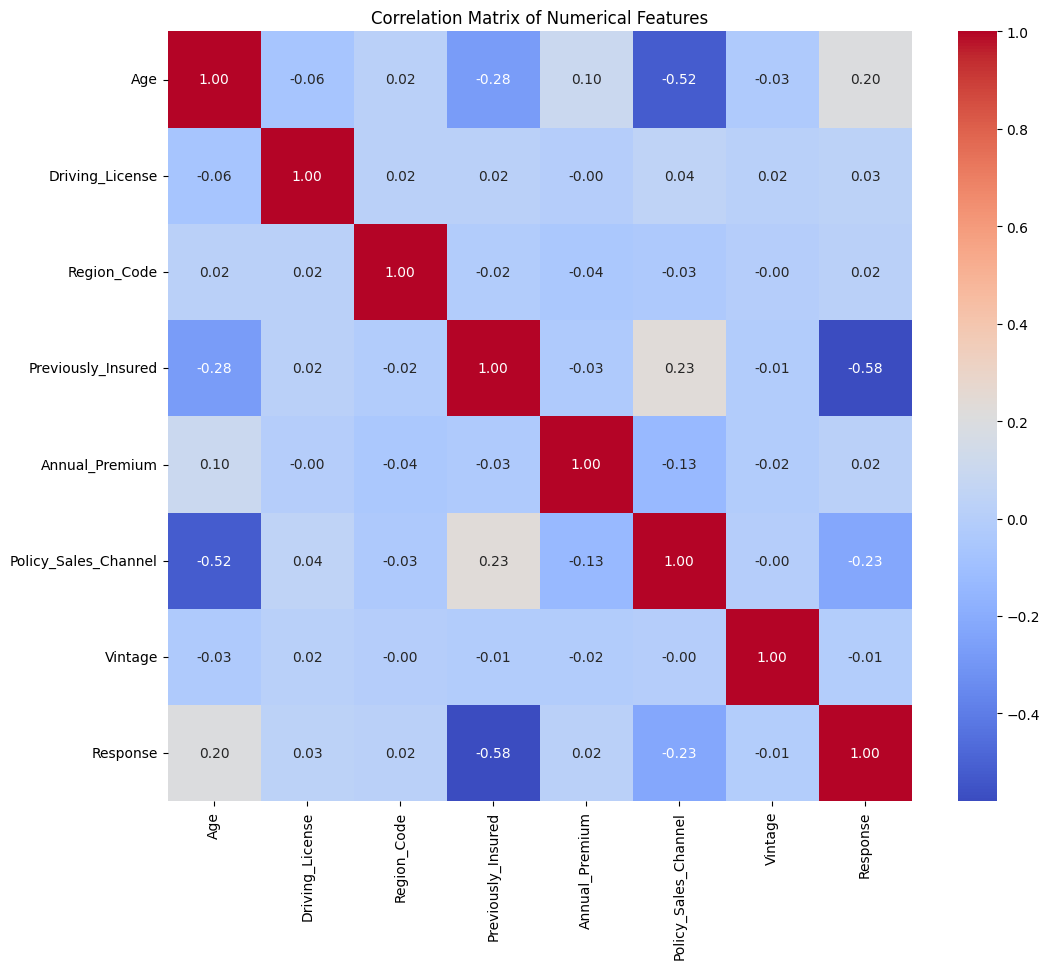

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
X = df.drop(columns=['Response'])
y = df[['Response']]

In [ ]:
df_columns = X.columns
df_columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249


In [ ]:
y.head()

,Response
1,0
3,0
4,0
5,0
6,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 10), (400, 10), (1600, 1), (400, 1))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Assuming numerical_columns and categorical_columns are defined as in your previous code
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OrdinalEncoder(), categorical_columns)
    ])

# Fit and transform the training data
X_train = preprocessor.fit_transform(X_train)

# Transform the testing data (important: use transform, not fit_transform)
X_test = preprocessor.transform(X_test)

In [ ]:
numerical_columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
categorical_columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [ ]:
X.dtypes

,0
Gender,object
Age,int64
Driving_License,int64
Region_Code,float64
Previously_Insured,int64
Vehicle_Age,object
Vehicle_Damage,object
Annual_Premium,float64
Policy_Sales_Channel,float64
Vintage,int64


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 10), (400, 10), (1600, 1), (400, 1))

In [ ]:
label = y_test['Response'].unique().tolist()
label

[0, 1]

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report, precision_recall_fscore_support
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
    print(f'Weighted Precision: {precision}')
    print(f'Weighted Recall: {recall}')
    print(f'Weighted F1-score: {f1}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time, precision, recall, f1]

Results for LogisticRegression:

Training time (sec) = 1.0133717060089111
Prediction time (sec) = 0.0003097057342529297

Training score = 0.78
Testing score = 0.7775

No of misclassified for class 0 (test data) = 86
No of misclassified for class 1 (test data) = 3
Total no of misclassified points (test data) = 89
Total % of misclassified points (test data) = 0.2225

Training log_loss = 0.44753049220020374
Testing log_loss = 0.4598882709810239

Weighted Precision: 0.8352360242819605
Weighted Recall: 0.7775
Weighted F1-score: 0.7674889459281176

Confusion matrix:


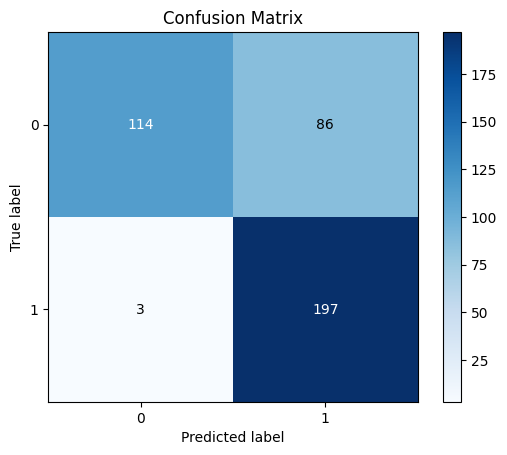

Classification report:

              precision    recall  f1-score   support

           0       0.97      0.57      0.72       200
           1       0.70      0.98      0.82       200

    accuracy                           0.78       400
   macro avg       0.84      0.78      0.77       400
weighted avg       0.84      0.78      0.77       400

**************************************************************************


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.005548238754272461
Prediction time (sec) = 0.0001964569091796875

Training score = 0.78125
Testing score = 0.7775

No of misclassified for class 0 (test data) = 86
No of misclassified for class 1 (test data) = 3
Total no of misclassified points (test data) = 89
Total % of misclassified points (test data) = 0.2225

Weighted Precision: 0.8352360242819605
Weighted Recall: 0.7775
Weighted F1-score: 0.7674889459281176

Confusion matrix:


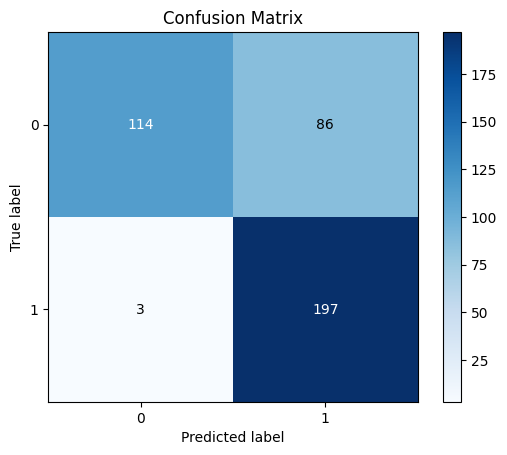

Classification report:

              precision    recall  f1-score   support

           0       0.97      0.57      0.72       200
           1       0.70      0.98      0.82       200

    accuracy                           0.78       400
   macro avg       0.84      0.78      0.77       400
weighted avg       0.84      0.78      0.77       400

**************************************************************************


In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.008572578430175781
Prediction time (sec) = 0.0002593994140625

Training score = 1.0
Testing score = 0.705

No of misclassified for class 0 (test data) = 57
No of misclassified for class 1 (test data) = 61
Total no of misclassified points (test data) = 118
Total % of misclassified points (test data) = 0.295

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 10.63287774978956

Weighted Precision: 0.7050820328131252
Weighted Recall: 0.705
Weighted F1-score: 0.7049704970497049

Confusion matrix:


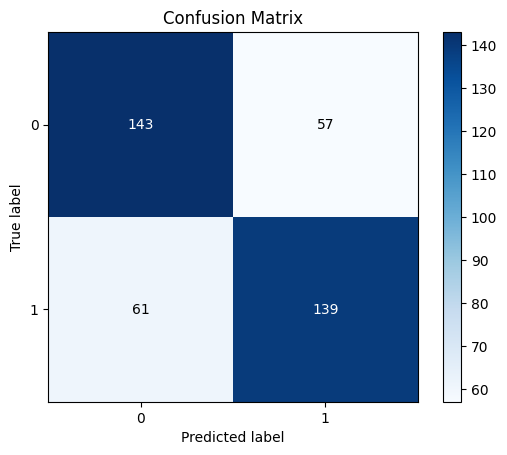

Classification report:

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       200
           1       0.71      0.69      0.70       200

    accuracy                           0.70       400
   macro avg       0.71      0.70      0.70       400
weighted avg       0.71      0.70      0.70       400

**************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.16830134391784668
Prediction time (sec) = 0.017592906951904297

Training score = 1.0
Testing score = 0.7424999999999999

No of misclassified for class 0 (test data) = 68
No of misclassified for class 1 (test data) = 35
Total no of misclassified points (test data) = 103
Total % of misclassified points (test data) = 0.2575

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.5636770874092438

Weighted Precision: 0.7492868340572074
Weighted Recall: 0.7425
Weighted F1-score: 0.7407353801813593

Confusion matrix:


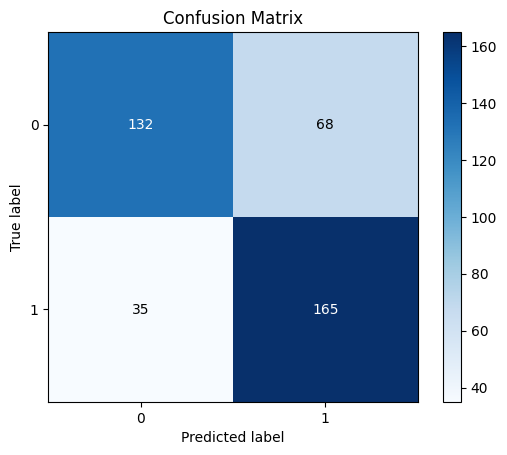

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       200
           1       0.71      0.82      0.76       200

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400

**************************************************************************


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.2305295467376709
Prediction time (sec) = 0.008884429931640625

Training score = 1.0
Testing score = 0.7775000000000001

No of misclassified for class 0 (test data) = 69
No of misclassified for class 1 (test data) = 20
Total no of misclassified points (test data) = 89
Total % of misclassified points (test data) = 0.2225

Training log_loss = 0.1209336553980272
Testing log_loss = 0.4736337326216363

Weighted Precision: 0.7952206175696162
Weighted Recall: 0.7775
Weighted F1-score: 0.7741102418162552

Confusion matrix:


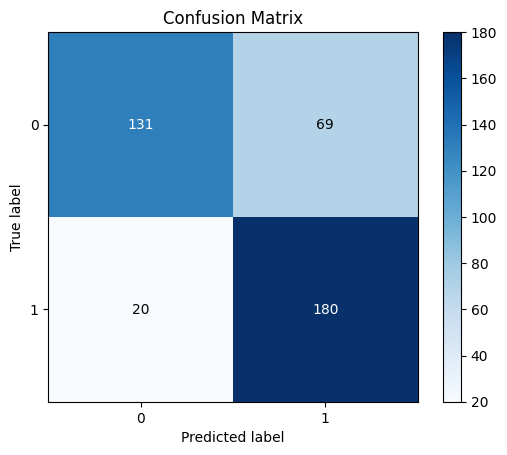

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.66      0.75       200
           1       0.72      0.90      0.80       200

    accuracy                           0.78       400
   macro avg       0.80      0.78      0.77       400
weighted avg       0.80      0.78      0.77       400

**************************************************************************


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

Results for XGBClassifier:

Training time (sec) = 0.2450857162475586
Prediction time (sec) = 0.0012013912200927734

Training score = 0.994375
Testing score = 0.7475

No of misclassified for class 0 (test data) = 69
No of misclassified for class 1 (test data) = 32
Total no of misclassified points (test data) = 101
Total % of misclassified points (test data) = 0.2525

Training log_loss = 0.10034083203949853
Testing log_loss = 0.5636997576842447

Weighted Precision: 0.7562708705443814
Weighted Recall: 0.7475
Weighted F1-score: 0.7453209019674591

Confusion matrix:


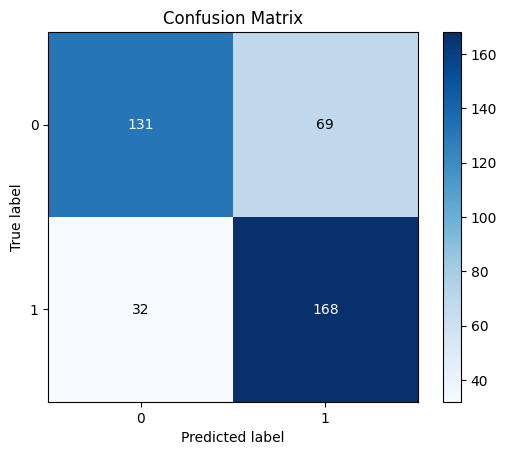

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       200
           1       0.71      0.84      0.77       200

    accuracy                           0.75       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.76      0.75      0.75       400

**************************************************************************


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight='balanced')
XGB_results = evaluate_model(xgb, X_train, y_train, X_test, y_test, label)

In [ ]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results,XGB_results]
s2=['LR','LSVC','DTC','ETC','RFC','XGB']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time','Precision','Recall','F1-score']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time,Precision,Recall,F1-score
0,LR,0.780000,0.7775,89,0.2225,4.475305e-01,0.459888,1.013372,0.000310,0.835236,0.7775,0.767489
1,LSVC,0.781250,0.7775,89,0.2225,NaN,NaN,0.005548,0.000196,0.835236,0.7775,0.767489
2,DTC,1.000000,0.7050,118,0.2950,2.220446e-16,10.632878,0.008573,0.000259,0.705082,0.7050,0.704970
3,ETC,1.000000,0.7425,103,0.2575,2.220446e-16,0.563677,0.168301,0.017593,0.749287,0.7425,0.740735
4,RFC,1.000000,0.7775,89,0.2225,1.209337e-01,0.473634,0.230530,0.008884,0.795221,0.7775,0.774110
5,XGB,0.994375,0.7475,101,0.2525,1.003408e-01,0.563700,0.245086,0.001201,0.756271,0.7475,0.745321


In [ ]:
result = result.sort_values(by='Missclassified-point', ascending=True)
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time,Precision,Recall,F1-score
0,LR,0.780000,0.7775,89,0.2225,4.475305e-01,0.459888,1.013372,0.000310,0.835236,0.7775,0.767489
1,LSVC,0.781250,0.7775,89,0.2225,NaN,NaN,0.005548,0.000196,0.835236,0.7775,0.767489
4,RFC,1.000000,0.7775,89,0.2225,1.209337e-01,0.473634,0.230530,0.008884,0.795221,0.7775,0.774110
5,XGB,0.994375,0.7475,101,0.2525,1.003408e-01,0.563700,0.245086,0.001201,0.756271,0.7475,0.745321
3,ETC,1.000000,0.7425,103,0.2575,2.220446e-16,0.563677,0.168301,0.017593,0.749287,0.7425,0.740735
2,DTC,1.000000,0.7050,118,0.2950,2.220446e-16,10.632878,0.008573,0.000259,0.705082,0.7050,0.704970


In [ ]:
rfc

RandomForestClassifier(class_weight='balanced')

In [ ]:
# Assuming rf_model is your trained Random Forest model
importances = rfc.feature_importances_

# Assuming your feature names are stored in a list `feature_names`
feature_names = df_columns  # Or a list of feature names if you have them separately

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
9,Vintage,0.173431
0,Gender,0.168076
3,Region_Code,0.153682
6,Vehicle_Damage,0.147697
4,Previously_Insured,0.126832
2,Driving_License,0.089414
5,Vehicle_Age,0.085377
8,Policy_Sales_Channel,0.030524
7,Annual_Premium,0.024321
1,Age,0.000646


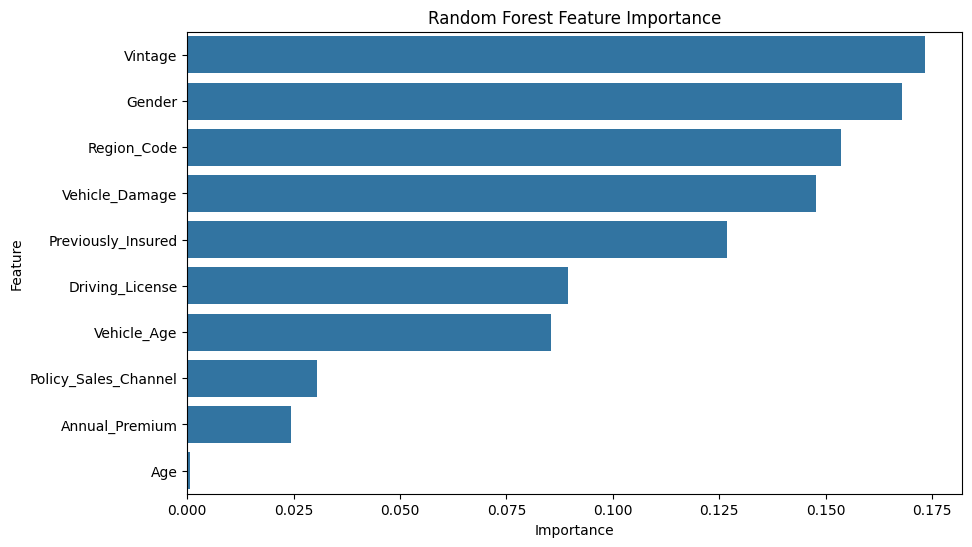

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
rfc

RandomForestClassifier(class_weight='balanced')

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')),
                                ('cat', OrdinalEncoder(),
                                 Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object'))])

In [ ]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(preprocessor, rfc)
joblib.dump(pipeline, 'insurance_sell_prediction_pipeline.joblib')

['insurance_sell_prediction_pipeline.joblib']

## Prediction

In [ ]:
import joblib
pipeline = joblib.load('insurance_sell_prediction_pipeline.joblib')

In [ ]:
import numpy as np

def predict_insurance(d):
    df = pd.DataFrame([d])
    pred = pipeline.predict(df)
    prob = np.max(pipeline.predict_proba(df))
    return pred, round(prob,2)

In [ ]:
d = X.head(1).to_dict(orient='index')[1]
d

{'Gender': 'Male',
 'Age': 76,
 'Driving_License': 1,
 'Region_Code': 3.0,
 'Previously_Insured': 0,
 'Vehicle_Age': '1-2 Year',
 'Vehicle_Damage': 'No',
 'Annual_Premium': 33536.0,
 'Policy_Sales_Channel': 26.0,
 'Vintage': 183}

In [ ]:
pred, prob = predict_insurance(d)
print(f'Prediction: {pred[0]}')
print(f'Probability: {prob}')

Prediction: 0
Probability: 1.0


In [ ]:
X.to_csv("sample_data.csv",index=False)

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the prediction pipeline
pipeline = joblib.load('insurance_sell_prediction_pipeline.joblib')

# Load sample data to infer types and ranges
sample_data = pd.read_csv('/content/sample_data.csv')

numerical_columns = sample_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = sample_data.select_dtypes(include=['object']).columns.tolist()

def get_column_info(df):
    column_info = {}
    for col in df.columns:
        if col in numerical_columns:
            column_info[col] = {
                'dtype': df[col].dtype,
                'min': df[col].min(),
                'max': df[col].max()
            }
        elif col in categorical_columns:
            column_info[col] = {
                'dtype': df[col].dtype,
                'unique': df[col].unique().tolist()
            }
    return column_info

column_info = get_column_info(sample_data)

def predict_insurance(d):
    df = pd.DataFrame([d])
    pred = pipeline.predict(df)
    prob = np.max(pipeline.predict_proba(df))
    return pred[0], round(prob, 2)

# Streamlit UI
st.title("Insurance Sell Prediction")

user_input = {}
for col, info in column_info.items():
    if info['dtype'] in ['int64', 'float64']:
        user_input[col] = st.number_input(f"{col}", min_value=info['min'], max_value=info['max'], value=info['min'])
    else:
        user_input[col] = st.selectbox(f"{col}", options=info['unique'])

if st.button("Predict"):
    prediction, probability = predict_insurance(user_input)
    st.write(f'Prediction: {prediction}')
    st.write(f'Probability: {probability}')


Writing app.py


In [ ]:
from pyngrok import ngrok

ngrok_key = "2t2aJFPi51AyTYLCWsAzwdbCkon_4RGJKMvMDe9DxHNuGyDLN"
port = 8501

ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

'https://a927-34-170-177-156.ngrok-free.app'

In [ ]:
!rm -rf logs.txt && streamlit run app.py &>/content/logs.txt